## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9665568	total: 57.7ms	remaining: 57.6s
1:	learn: 0.9482675	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9281462	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9117801	total: 60.6ms	remaining: 15.1s
4:	learn: 0.8962696	total: 61.4ms	remaining: 12.2s
5:	learn: 0.8788976	total: 62.3ms	remaining: 10.3s
6:	learn: 0.8623329	total: 63.1ms	remaining: 8.95s
7:	learn: 0.8457992	total: 64ms	remaining: 7.93s
8:	learn: 0.8307713	total: 64.8ms	remaining: 7.13s
9:	learn: 0.8142058	total: 65.6ms	remaining: 6.49s
10:	learn: 0.8011519	total: 66.6ms	remaining: 5.99s
11:	learn: 0.7872717	total: 67.4ms	remaining: 5.55s
12:	learn: 0.7729293	total: 68.2ms	remaining: 5.18s
13:	learn: 0.7579522	total: 69ms	remaining: 4.86s
14:	learn: 0.7459589	total: 69.8ms	remaining: 4.58s
15:	learn: 0.7329829	total: 70.6ms	remaining: 4.34s
16:	learn: 0.7206705	total: 71.5ms	remaining: 4.13s
17:	learn: 0.7089446	total: 72.3ms	remaining: 3.94s
18:	learn: 0.6971789	total: 73.8ms	remaining: 3.

62:	learn: 0.4049997	total: 110ms	remaining: 1.63s
63:	learn: 0.4017942	total: 110ms	remaining: 1.61s
64:	learn: 0.3982097	total: 111ms	remaining: 1.6s
65:	learn: 0.3940487	total: 112ms	remaining: 1.59s
66:	learn: 0.3902099	total: 113ms	remaining: 1.58s
67:	learn: 0.3866002	total: 114ms	remaining: 1.56s
68:	learn: 0.3831883	total: 115ms	remaining: 1.55s
69:	learn: 0.3801228	total: 116ms	remaining: 1.54s
70:	learn: 0.3766611	total: 116ms	remaining: 1.52s
71:	learn: 0.3741562	total: 117ms	remaining: 1.51s
72:	learn: 0.3717812	total: 118ms	remaining: 1.5s
73:	learn: 0.3688281	total: 119ms	remaining: 1.49s
74:	learn: 0.3654270	total: 120ms	remaining: 1.48s
75:	learn: 0.3630559	total: 121ms	remaining: 1.47s
76:	learn: 0.3603431	total: 121ms	remaining: 1.45s
77:	learn: 0.3579572	total: 122ms	remaining: 1.44s
78:	learn: 0.3554327	total: 123ms	remaining: 1.43s
79:	learn: 0.3530434	total: 124ms	remaining: 1.42s
80:	learn: 0.3503818	total: 125ms	remaining: 1.42s
81:	learn: 0.3476452	total: 126ms

160:	learn: 0.2433942	total: 192ms	remaining: 1s
161:	learn: 0.2424730	total: 193ms	remaining: 998ms
162:	learn: 0.2417930	total: 194ms	remaining: 995ms
163:	learn: 0.2409938	total: 195ms	remaining: 992ms
164:	learn: 0.2402959	total: 196ms	remaining: 990ms
165:	learn: 0.2394886	total: 197ms	remaining: 988ms
166:	learn: 0.2387224	total: 197ms	remaining: 985ms
167:	learn: 0.2380206	total: 198ms	remaining: 982ms
168:	learn: 0.2372914	total: 199ms	remaining: 979ms
169:	learn: 0.2366132	total: 200ms	remaining: 976ms
170:	learn: 0.2356810	total: 201ms	remaining: 973ms
171:	learn: 0.2350661	total: 202ms	remaining: 970ms
172:	learn: 0.2345504	total: 202ms	remaining: 967ms
173:	learn: 0.2336863	total: 203ms	remaining: 964ms
174:	learn: 0.2328102	total: 204ms	remaining: 961ms
175:	learn: 0.2322532	total: 205ms	remaining: 958ms
176:	learn: 0.2316903	total: 206ms	remaining: 956ms
177:	learn: 0.2310448	total: 206ms	remaining: 953ms
178:	learn: 0.2305144	total: 207ms	remaining: 951ms
179:	learn: 0.2

288:	learn: 0.1748504	total: 300ms	remaining: 739ms
289:	learn: 0.1742255	total: 301ms	remaining: 738ms
290:	learn: 0.1741238	total: 302ms	remaining: 736ms
291:	learn: 0.1737604	total: 303ms	remaining: 734ms
292:	learn: 0.1733723	total: 304ms	remaining: 733ms
293:	learn: 0.1729701	total: 305ms	remaining: 731ms
294:	learn: 0.1726329	total: 305ms	remaining: 730ms
295:	learn: 0.1722476	total: 306ms	remaining: 729ms
296:	learn: 0.1716879	total: 307ms	remaining: 728ms
297:	learn: 0.1711709	total: 308ms	remaining: 726ms
298:	learn: 0.1706544	total: 309ms	remaining: 725ms
299:	learn: 0.1705413	total: 310ms	remaining: 723ms
300:	learn: 0.1699474	total: 311ms	remaining: 722ms
301:	learn: 0.1695876	total: 312ms	remaining: 720ms
302:	learn: 0.1693061	total: 312ms	remaining: 718ms
303:	learn: 0.1689727	total: 313ms	remaining: 717ms
304:	learn: 0.1684998	total: 314ms	remaining: 716ms
305:	learn: 0.1683920	total: 315ms	remaining: 714ms
306:	learn: 0.1682867	total: 316ms	remaining: 713ms
307:	learn: 

383:	learn: 0.1466309	total: 383ms	remaining: 614ms
384:	learn: 0.1465851	total: 384ms	remaining: 613ms
385:	learn: 0.1463961	total: 385ms	remaining: 612ms
386:	learn: 0.1459968	total: 386ms	remaining: 611ms
387:	learn: 0.1458722	total: 386ms	remaining: 610ms
388:	learn: 0.1458311	total: 387ms	remaining: 608ms
389:	learn: 0.1456846	total: 388ms	remaining: 607ms
390:	learn: 0.1454855	total: 389ms	remaining: 606ms
391:	learn: 0.1451413	total: 390ms	remaining: 605ms
392:	learn: 0.1447976	total: 391ms	remaining: 603ms
393:	learn: 0.1445856	total: 392ms	remaining: 603ms
394:	learn: 0.1445247	total: 393ms	remaining: 601ms
395:	learn: 0.1444721	total: 393ms	remaining: 600ms
396:	learn: 0.1442432	total: 395ms	remaining: 600ms
397:	learn: 0.1439885	total: 396ms	remaining: 598ms
398:	learn: 0.1435346	total: 397ms	remaining: 597ms
399:	learn: 0.1432661	total: 397ms	remaining: 596ms
400:	learn: 0.1429352	total: 398ms	remaining: 595ms
401:	learn: 0.1426081	total: 399ms	remaining: 593ms
402:	learn: 

508:	learn: 0.1167024	total: 491ms	remaining: 474ms
509:	learn: 0.1165361	total: 492ms	remaining: 473ms
510:	learn: 0.1165111	total: 493ms	remaining: 472ms
511:	learn: 0.1163017	total: 494ms	remaining: 471ms
512:	learn: 0.1162653	total: 494ms	remaining: 469ms
513:	learn: 0.1160349	total: 495ms	remaining: 468ms
514:	learn: 0.1158306	total: 496ms	remaining: 467ms
515:	learn: 0.1155633	total: 497ms	remaining: 466ms
516:	learn: 0.1152753	total: 498ms	remaining: 465ms
517:	learn: 0.1151695	total: 499ms	remaining: 464ms
518:	learn: 0.1149619	total: 500ms	remaining: 463ms
519:	learn: 0.1146828	total: 500ms	remaining: 462ms
520:	learn: 0.1146196	total: 501ms	remaining: 461ms
521:	learn: 0.1144434	total: 502ms	remaining: 460ms
522:	learn: 0.1142774	total: 503ms	remaining: 459ms
523:	learn: 0.1140789	total: 504ms	remaining: 458ms
524:	learn: 0.1140525	total: 505ms	remaining: 456ms
525:	learn: 0.1140037	total: 505ms	remaining: 455ms
526:	learn: 0.1138901	total: 506ms	remaining: 455ms
527:	learn: 

607:	learn: 0.1004578	total: 574ms	remaining: 370ms
608:	learn: 0.1002593	total: 575ms	remaining: 369ms
609:	learn: 0.1000867	total: 576ms	remaining: 368ms
610:	learn: 0.0999072	total: 576ms	remaining: 367ms
611:	learn: 0.0996390	total: 577ms	remaining: 366ms
612:	learn: 0.0994836	total: 578ms	remaining: 365ms
613:	learn: 0.0993555	total: 579ms	remaining: 364ms
614:	learn: 0.0991532	total: 580ms	remaining: 363ms
615:	learn: 0.0990776	total: 580ms	remaining: 362ms
616:	learn: 0.0988156	total: 581ms	remaining: 361ms
617:	learn: 0.0987159	total: 582ms	remaining: 360ms
618:	learn: 0.0985592	total: 583ms	remaining: 359ms
619:	learn: 0.0983900	total: 584ms	remaining: 358ms
620:	learn: 0.0981685	total: 584ms	remaining: 357ms
621:	learn: 0.0980241	total: 585ms	remaining: 356ms
622:	learn: 0.0979502	total: 586ms	remaining: 355ms
623:	learn: 0.0977850	total: 587ms	remaining: 354ms
624:	learn: 0.0976436	total: 587ms	remaining: 352ms
625:	learn: 0.0975074	total: 589ms	remaining: 352ms
626:	learn: 

729:	learn: 0.0839971	total: 681ms	remaining: 252ms
730:	learn: 0.0838895	total: 682ms	remaining: 251ms
731:	learn: 0.0838135	total: 683ms	remaining: 250ms
732:	learn: 0.0835704	total: 684ms	remaining: 249ms
733:	learn: 0.0835589	total: 685ms	remaining: 248ms
734:	learn: 0.0834270	total: 686ms	remaining: 247ms
735:	learn: 0.0833005	total: 687ms	remaining: 246ms
736:	learn: 0.0830553	total: 688ms	remaining: 246ms
737:	learn: 0.0830353	total: 689ms	remaining: 245ms
738:	learn: 0.0830180	total: 690ms	remaining: 244ms
739:	learn: 0.0828249	total: 691ms	remaining: 243ms
740:	learn: 0.0827040	total: 692ms	remaining: 242ms
741:	learn: 0.0825707	total: 692ms	remaining: 241ms
742:	learn: 0.0824712	total: 693ms	remaining: 240ms
743:	learn: 0.0823008	total: 694ms	remaining: 239ms
744:	learn: 0.0821105	total: 695ms	remaining: 238ms
745:	learn: 0.0819939	total: 696ms	remaining: 237ms
746:	learn: 0.0819739	total: 697ms	remaining: 236ms
747:	learn: 0.0817991	total: 697ms	remaining: 235ms
748:	learn: 

828:	learn: 0.0728431	total: 764ms	remaining: 158ms
829:	learn: 0.0728042	total: 765ms	remaining: 157ms
830:	learn: 0.0726421	total: 766ms	remaining: 156ms
831:	learn: 0.0725081	total: 767ms	remaining: 155ms
832:	learn: 0.0724845	total: 768ms	remaining: 154ms
833:	learn: 0.0723470	total: 769ms	remaining: 153ms
834:	learn: 0.0722337	total: 770ms	remaining: 152ms
835:	learn: 0.0721803	total: 770ms	remaining: 151ms
836:	learn: 0.0721332	total: 771ms	remaining: 150ms
837:	learn: 0.0720136	total: 772ms	remaining: 149ms
838:	learn: 0.0719054	total: 773ms	remaining: 148ms
839:	learn: 0.0718285	total: 774ms	remaining: 147ms
840:	learn: 0.0716973	total: 775ms	remaining: 146ms
841:	learn: 0.0715485	total: 775ms	remaining: 146ms
842:	learn: 0.0714212	total: 776ms	remaining: 145ms
843:	learn: 0.0714043	total: 777ms	remaining: 144ms
844:	learn: 0.0712515	total: 778ms	remaining: 143ms
845:	learn: 0.0710991	total: 779ms	remaining: 142ms
846:	learn: 0.0710802	total: 780ms	remaining: 141ms
847:	learn: 

952:	learn: 0.0625702	total: 873ms	remaining: 43ms
953:	learn: 0.0624572	total: 875ms	remaining: 42.2ms
954:	learn: 0.0623258	total: 876ms	remaining: 41.3ms
955:	learn: 0.0622465	total: 876ms	remaining: 40.3ms
956:	learn: 0.0621315	total: 877ms	remaining: 39.4ms
957:	learn: 0.0620472	total: 878ms	remaining: 38.5ms
958:	learn: 0.0619590	total: 879ms	remaining: 37.6ms
959:	learn: 0.0619494	total: 880ms	remaining: 36.7ms
960:	learn: 0.0618683	total: 881ms	remaining: 35.7ms
961:	learn: 0.0618438	total: 882ms	remaining: 34.8ms
962:	learn: 0.0617168	total: 882ms	remaining: 33.9ms
963:	learn: 0.0616457	total: 883ms	remaining: 33ms
964:	learn: 0.0615450	total: 884ms	remaining: 32.1ms
965:	learn: 0.0614680	total: 885ms	remaining: 31.1ms
966:	learn: 0.0613858	total: 886ms	remaining: 30.2ms
967:	learn: 0.0613344	total: 886ms	remaining: 29.3ms
968:	learn: 0.0612807	total: 887ms	remaining: 28.4ms
969:	learn: 0.0612367	total: 888ms	remaining: 27.5ms
970:	learn: 0.0611617	total: 889ms	remaining: 26.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

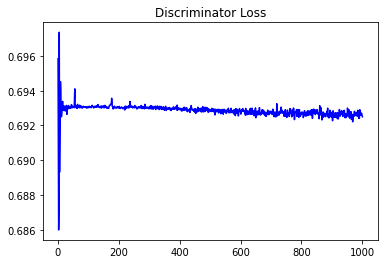

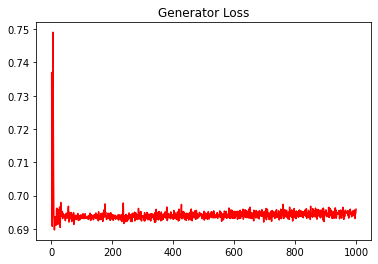

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1510763453863635


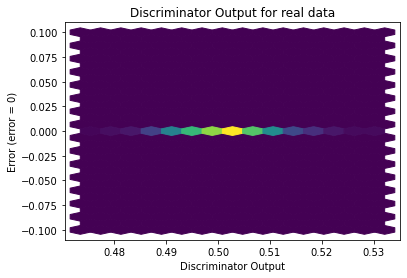

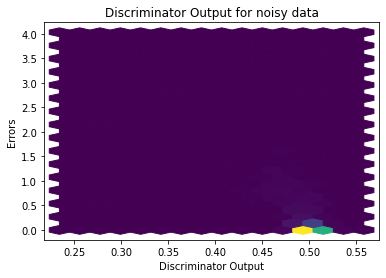

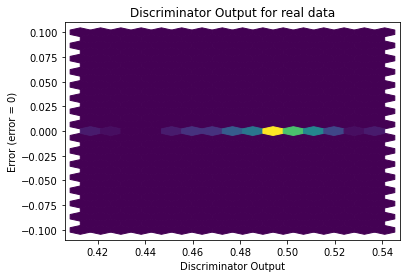

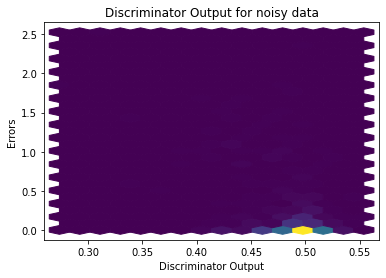

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


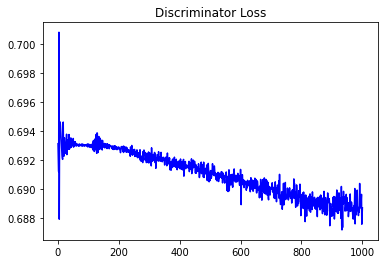

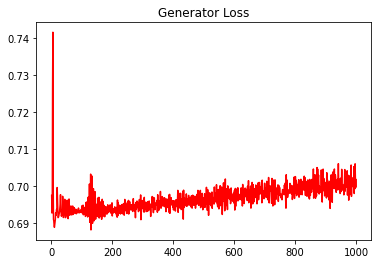

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1812163390130107


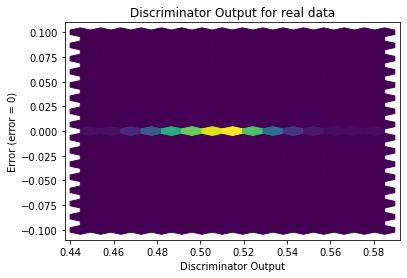

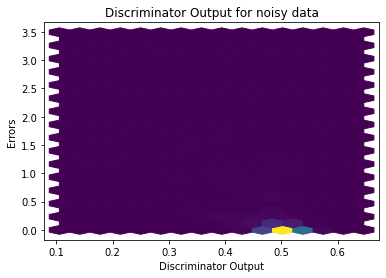

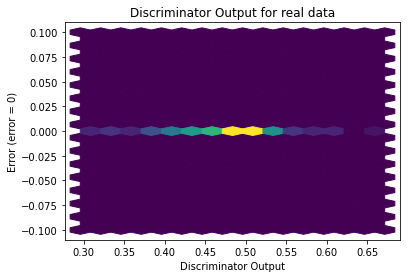

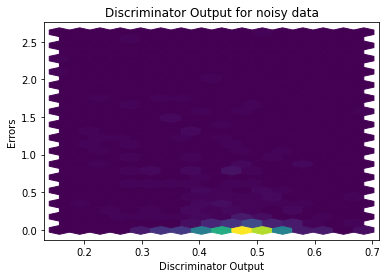

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1585]], requires_grad=True)
